# LPG Bullet data analysis

In [1]:
# Import required objects.
from propylean import properties as prop
from propylean import Bullet

In [2]:
# Creating Bullet object for analysis.
lpg_1 = Bullet(tag="LPG-2101",
               ID=prop.Length(3.5, "m"),
               length=prop.Length(36, "m"),
               thickness=prop.Length(20, "mm"))
lpg_1

Bullet with tag: LPG-2101

### Set operation and control parameters.

In [3]:
# Normal operating temperature and pressure.
lpg_1.operating_pressure = prop.Pressure(6, "bar")
lpg_1.operating_temperature = prop.Temperature(55, "C")

# Liquid level settings.
lpg_1.LLLL = prop.Length(0.5, "m")
lpg_1.LLL = prop.Length(1, "m")
lpg_1.NLL = prop.Length(1.5, "m")
lpg_1.HLL = prop.Length(2, "m")
lpg_1.HHLL = prop.Length(3, "m")

### Get the operations data.

In [4]:
# Import data from source as Pandas DataFrame.
import pandas as pd
df = pd.read_csv("bullet_data.csv", sep=";")
print(df.columns)

Index(['Unnamed: 0', 'time(s)', 'operating_temp(C)', 'operating_press(bar)',
       'liquid_level(m)'],
      dtype='object')


In [5]:
# Assign timeseries data to Bullet object properties.
lpg_1.liquid_level.df = df[["time(s)", "liquid_level(m)"]]
lpg_1.operating_pressure.df = df[["time(s)", "operating_press(bar)"]]
lpg_1.operating_temperature.df = df[["time(s)", "operating_temp(C)"]]

### Creating graph for each properties.

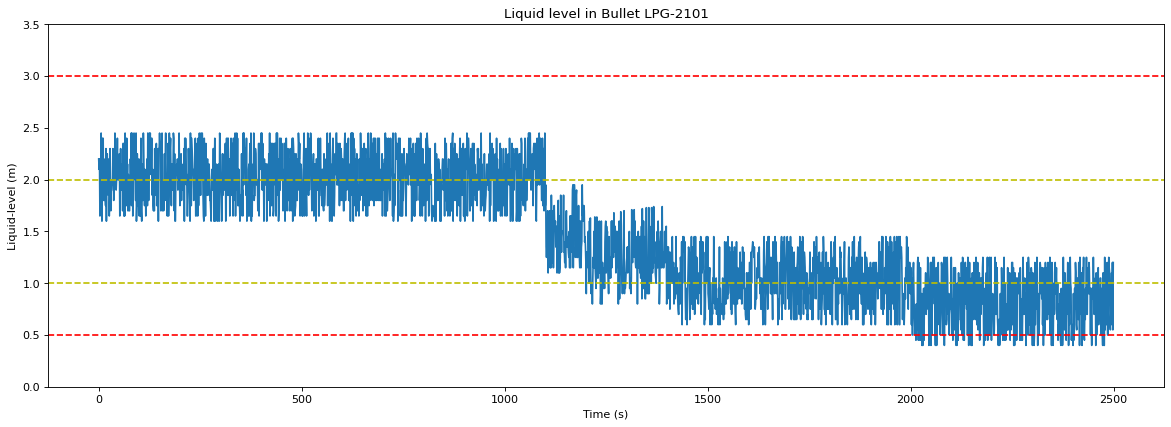

In [6]:
# Import plotting library.
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6), dpi=80)
# Plot
plt.plot('time(s)', 'liquid_level(m)', data=lpg_1.liquid_level.df)

# Labelling 
plt.ylabel("Liquid-level (m)") 
plt.xlabel("Time (s)")
plt.title("Liquid level in Bullet " + lpg_1.tag)

# Set plot limits.
plt.ylim(0, lpg_1.ID.value)
plt.axhline(y=lpg_1.HHLL.value, color='r', linestyle='--', )
plt.axhline(y=lpg_1.LLLL.value, color='r', linestyle='--', )
plt.axhline(y=lpg_1.HLL.value, color='y', linestyle='--', )
plt.axhline(y=lpg_1.LLL.value, color='y', linestyle='--', )

# Display
plt.show()

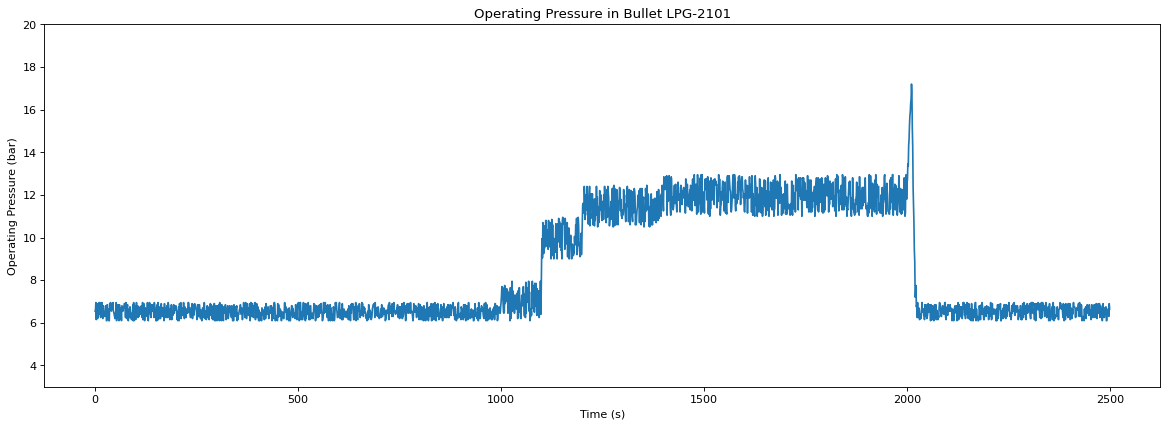

In [7]:
plt.figure(figsize=(18, 6), dpi=80)
# Plot
plt.plot('time(s)', 'operating_press(bar)', data=lpg_1.operating_pressure.df)
plt.ylim(3, 20)

# Labelling 
plt.ylabel("Operating Pressure (bar)")  # add X-axis label
plt.xlabel("Time (s)")  # add Y-axis label
plt.title("Operating Pressure in Bullet " + lpg_1.tag)  # add title

# Display
plt.show()

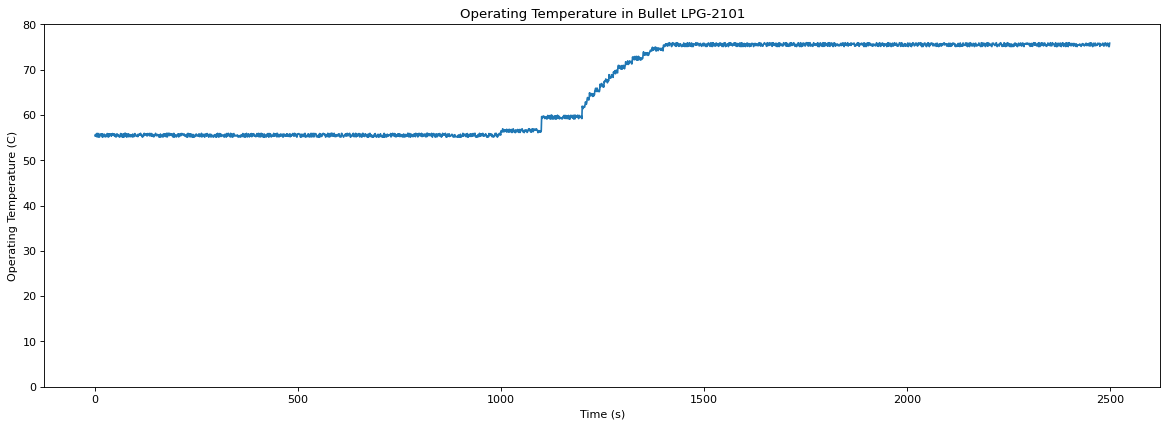

In [8]:
plt.figure(figsize=(18, 6), dpi=80)
# Plot
plt.plot('time(s)', 'operating_temp(C)', data=lpg_1.operating_temperature.df)
plt.ylim(0, 80)
# Labelling 
plt.ylabel("Operating Temperature (C)")  # add X-axis label
plt.xlabel("Time (s)")  # add Y-axis label
plt.title("Operating Temperature in Bullet " + lpg_1.tag)  # add title

# Display
plt.show()